# Mini Project D7041E , Group 31

## Jacob Möller,  jacmll-9@student.ltu.se
## Emil Wiklund, emiwik-9@student.ltu.se

### Introduction

This mini project were done to futher improve our skills in and understanding of using MLP (multi-layer-percepton neural network) for supervised learning. The project utalizes the familiar dataset MNIST.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

In [13]:
#loadning image data from MNIST of handwritten digits.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#loads 60k training images and 10k testing images (pre setting of this data load method)
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False)

## Data Sample

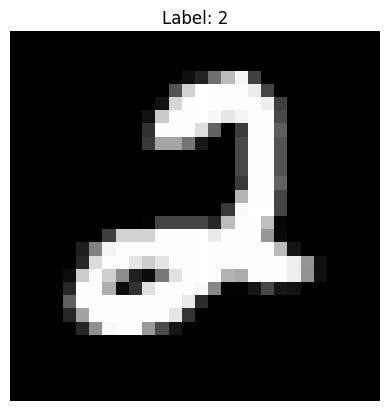

One random data sample from the MNIST data set.


In [14]:
sample_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
images, labels = next(iter(sample_loader))

image = images.squeeze().cpu().numpy()
label= labels.item()

plt.imshow(image, cmap='gray', extent=[0,14,14,0])
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

print("One random data sample from the MNIST data set.")

#kansek kan snacka om hur modellen ser ett sample

## Training phase

In [15]:
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


## Testing phase

In [16]:
def test_model(model):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

#trying to get the confusion to work
def test_model_2(model):
    model.eval()
    all_predictions = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
            all_images.extend(images)

    accuracy = accuracy_score(all_labels, all_predictions)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    return accuracy


## The model

In [17]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        

    def forward(self, x):
        x = x.view(x.size(0), -1) #flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)    
        x = F.softmax(x, dim = 1)
        return x

## Main

In [18]:
torch.manual_seed(42)

# Define parameters
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.001
#num_epochs = 100
num_epochs = 10

# Initialize model, loss function, and optimizer
model = MLPModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, criterion, optimizer, num_epochs)

# Test the model
#accuracy = test_model(model)

# Test the model with confusion
accuracy = test_model_2(model)
print(f"Accuracy on the test set: {accuracy}")


Confusion Matrix:
[[ 974    0    0    1    0    2    0    1    2    0]
 [   0 1120    4    2    0    2    1    2    4    0]
 [   6    2  989   18    2    2    5    5    3    0]
 [   1    0    3  983    0    9    0    9    5    0]
 [   4    0    4    0  942    2    7    4    3   16]
 [   7    0    1   13    0  859    4    2    5    1]
 [   9    3    3    1    1   12  923    2    4    0]
 [   2    6   17    6    0    2    0  991    0    4]
 [   4    0    3   15    4    6    4    5  932    1]
 [   6    6    2   16   18   16    1    7    4  933]]
Accuracy on the test set: 0.9646


In the confusion-matrix above the amount of correct prediction for a certain class is illustrated through the posistional indecies.

In the first row (row = 0) the calss corresponds to the handwritten digit of the number 0, the first coloum we can see that 974 samples were correctly predicted compared with its lable.

At index (i = 0 , j = 3) we can see that a sample with lable 0 was classified as the number 3.